# Employee Attrition and Performance

## Introduction

Employee attrition is an issue that has been puzzling the Human Resource Managers of various companies for a long time. In this project, we try to analyse what factors lead to employee retention in companies, and what factors influence them the most. We use a dataset that is published by the Human Resource department of IBM.

Poses a problem to be solved:
* What are key factors that are playing into current attrition rate ?
* What are key factors that are playing into current sactifaction rate ?

#### Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import random

## Table of Contents

#### 1.Take a look at the dataset
#### 2.Missing data
#### 3.Descriptive statistic
#### 4.EDA
#### 5.Statistic Tesing
   * Which key factors to Attrition?
   * Which key factors to Job Satisfaction?

#### 6.Final verdict
#### 7.My potential mistakes

## 1.Take a look 


In [2]:
Data=pd.read_csv("Data.csv")

print("Feature :",Data.shape[0])
print("Row     :",Data.shape[1])

Feature : 1470
Row     : 35


In [4]:
Data.columns # print feature 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [72]:
Data.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

**COMMENT:**
* All employees are over 18 years old
* EmployeeCount have type data only 1 unique

=> EmployeeCount and Over18 does not affect the target ,feature other



In [8]:
Data_New=Data.drop(columns=["Over18","EmployeeCount"])


In [9]:
Data.dtypes # print type data of each feature

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**COMMENT:**

* Data of each columns can be number or category
* The count of numbers is much bigger than the category

## 2.Missing value

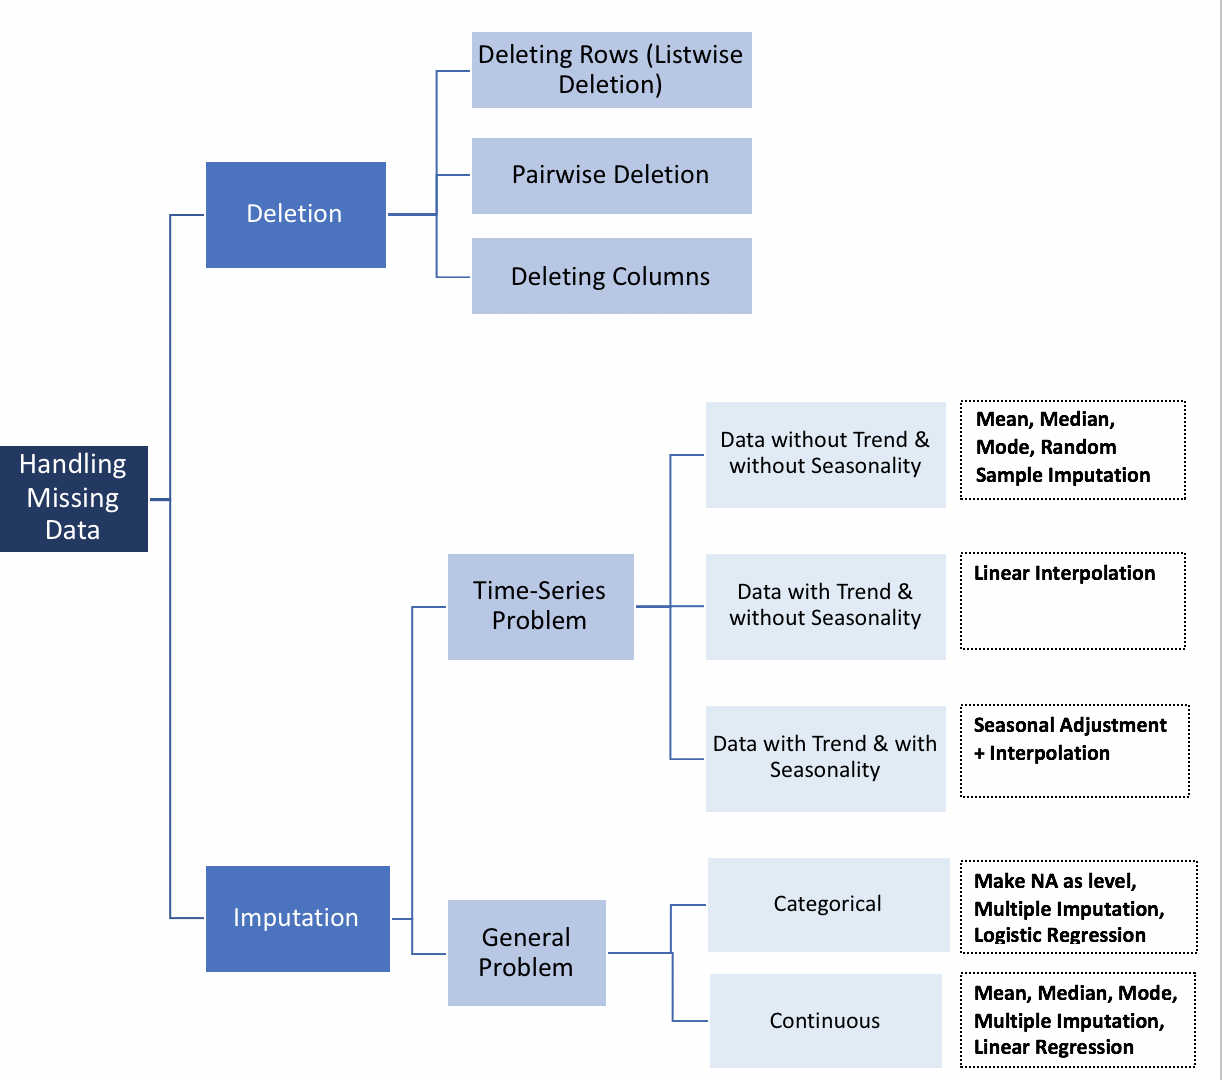

In [6]:
from IPython.display import Image
Image(filename='missingvalue.png') 

In [34]:

Data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

=> No data is missing

## 3. Descriptive statistic
**Target about :** 
* Attrition
* JobSatisfaction


In [35]:
Data_New.describe(percentiles=[0.01, 0.25,0.75, 0.99])

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
1%       19.000000   117.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
99%      58.310000  1485.000000         29.000000     5.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
1%          19.690000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
99%       2046.620000                 4.000000   100.000000        4.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  RelationshipSatisfaction  \
count  1470.000000      1470.000000  ...               1470.000000   
mean      2.063946         2.728571  ...                  2.712245   
std       1.106940         1.102846  ...                  1.081209   
min       1.000000         1.000000  ...                  1.000000   
1%        1.000000         1.000000  ...                  1.000000   
25%       1.000000         2.000000  ...                  2.000000   
50%       2.000000         3.000000  ...                  3.000000   
75%       3.000000         4.000000  ...                  4.000000   
99%       5.000000         4.000000  ...                  4.000000   
max       5.000000         4.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
1%              80.0          0.000000           1.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
99%             80.0          3.000000          35.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
1%                  0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
99%                 6.000000         4.000000       31.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137         

**COMMENT:**
* There is no negative data
* The value of 0.1% does not exceed the min threshold
* 99% value does not exceed the max threshold


## 4. EDA
### What are key factors that are playing into current attrition rate ?
##### Attrition

In [4]:

fig = make_subplots(rows=1, cols=2,
                   specs=[[{"type": "bar"}, {"type": "domain"}]])


trace0 = go.Histogram(x=Data['Attrition'], name='In number', marker={'color':['red', 'blue']},
                     showlegend=False)
fig.append_trace(trace0, 1, 1)

fig.update(layout_title_text='<b> Attrition </b>')
fig.update_layout(showlegend=False)

fig.show()

**COMMENT:**
The number of employees who do not agree to quit their job is much higher than that who quit

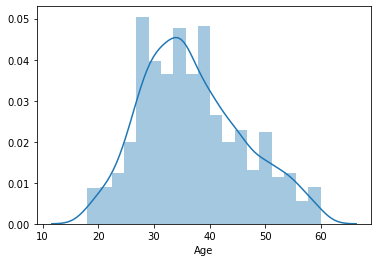

In [44]:

sns.distplot(Data['Age'])

has the same form normal distribution

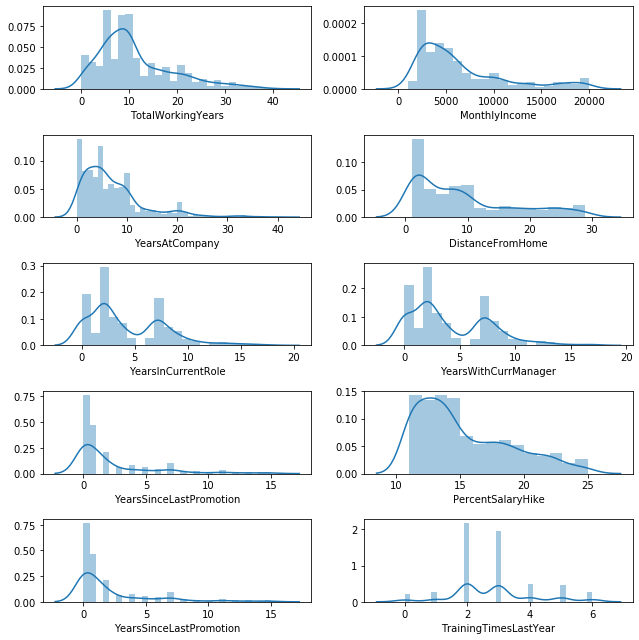

In [46]:
#Similarly we can do this for all the numerical features. Below I have plotted the subplots for the other features.
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(Data['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(Data['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(Data['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(Data['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(Data['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(Data['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(Data['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(Data['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(Data['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(Data['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

**Convert Attrition to binary to consider the correlation**

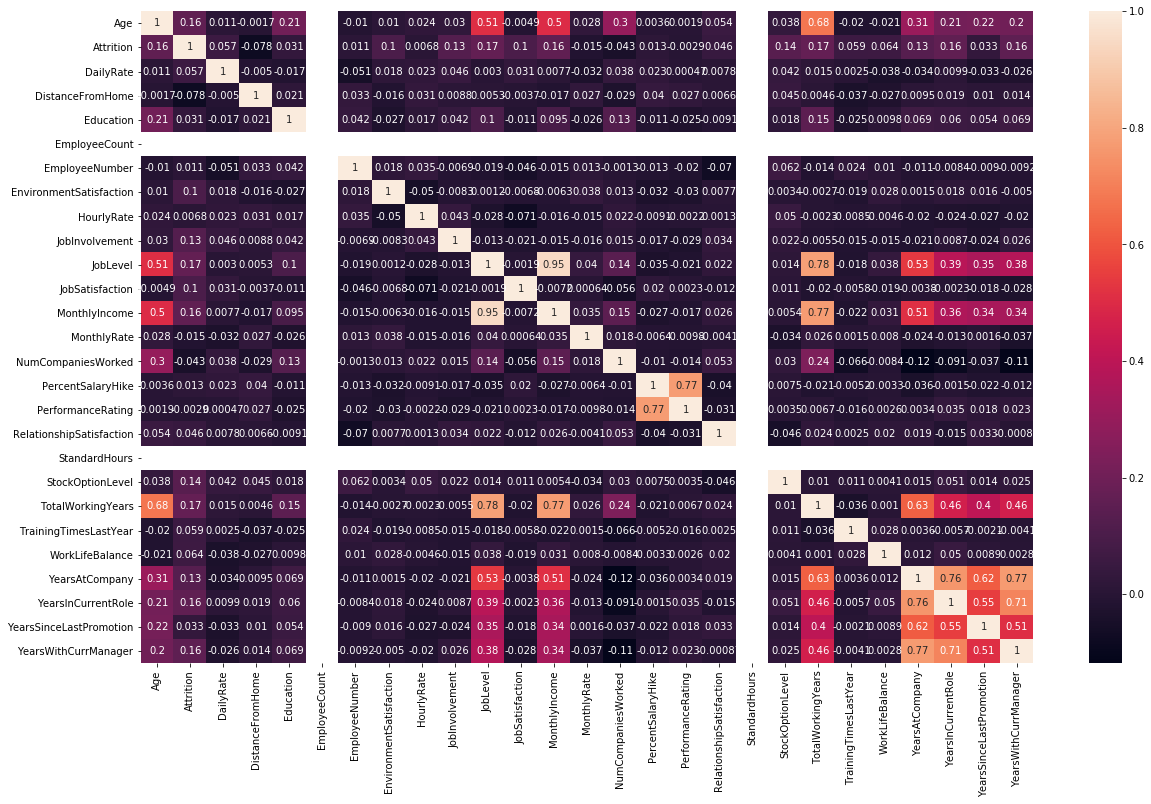

In [70]:
# lấy row có thuộc tính ==Yes
Data_binary=pd.read_csv("Data.csv")
row=list(Data_binary[Data_binary["Attrition"]=="Yes"].index)
#print(row)

#chuyển tất cả các data của target =1
Data_binary["Attrition"]=1
#chuyển các data của target có thuoc_tinh0=0
for r in row:
    Data_binary["Attrition"].loc[r]=0
#print(Data_binary)
Corr_data=Data_binary.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(Corr_data,vmax=1, annot=True)

**The higher the value, the more likely it is key factor of attrition**
* TotalWorkingYear (0.17)
* Joblevel (0.17)
* Age (0.16)
* MonthlyIncome(0.16)
* YearslnCurrentRole (0.16)
* YearsWithCurrManager (0.16)..


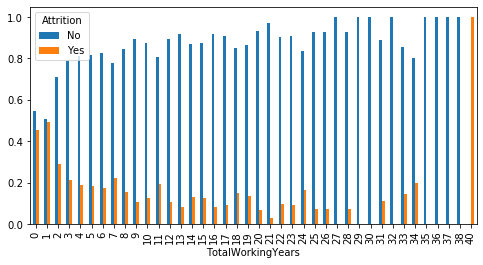

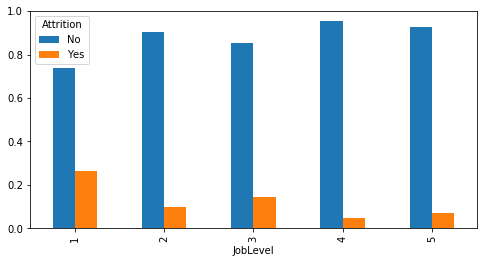

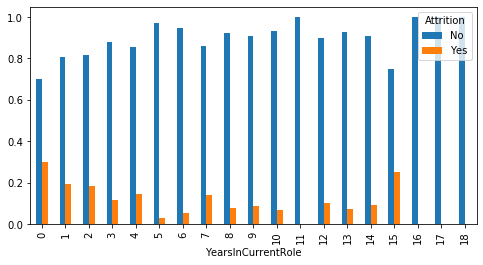

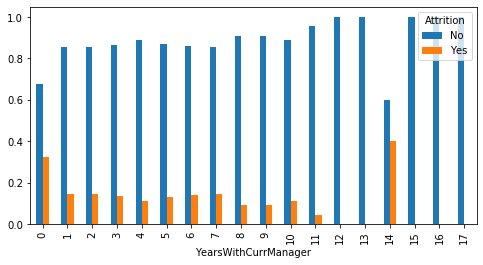

In [17]:
BarPlot_columns=["TotalWorkingYears","JobLevel","YearsInCurrentRole","YearsWithCurrManager"]
def Bar_plots(var):
    col=pd.crosstab(Data[var],Data.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
for col in BarPlot_columns:
    Bar_plots(col)

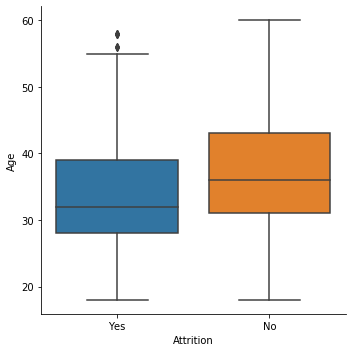

In [18]:
# Age -- Attrition
sns.catplot(x='Attrition', y='Age', data=Data,
           kind='box')

mean of "Yes" lower "No"

In [5]:
# Graph the relationship between Department and attrition
fig = make_subplots(rows=3, cols=2,
                   specs=[[{'rowspan':3}, {"type": "domain"}], # type miền
                          [None,          {"type": "domain"}],
                          [None,          {"type": "domain"}]])
labels = ['R&D', 'Sales', 'HR']

yes = Data['Department'][Data.Attrition=='Yes'].value_counts()
trace_yes = go.Bar(x=labels, y=-yes, marker={'color':'red'}, showlegend=False) 

no  = Data['Department'][Data.Attrition=='No'].value_counts()
trace_no  = go.Bar(x=labels, y=no, marker={'color':'blue'}, showlegend=False )

## Pie 1 -- upper right
RD = Data['Attrition'][Data.Department=='Research & Development'].value_counts()
trace_3   = go.Pie(labels=['No', 'Yes'], values=RD, name='RD')

## Pie 2
Sales = Data['Attrition'][Data.Department=='Sales'].value_counts()
trace_4   = go.Pie(labels=['No', 'Yes'], values=Sales, name='Sales')

## Pie 3
HR = Data['Attrition'][Data.Department=='Human Resources'].value_counts()
trace_5   = go.Pie(labels=['No', 'Yes'], values=HR, name='HR')

# Add traces
fig.append_trace(trace_yes, 1, 1)
fig.append_trace(trace_no, 1, 1)

fig.append_trace(trace_3, 1, 2)
fig.append_trace(trace_4, 2, 2)
fig.append_trace(trace_5, 3, 2)

# Customize
fig.update(layout_title_text='<b> Attrition by Department </b>')

# Done
fig.show()


Value % different => is key factor

[]

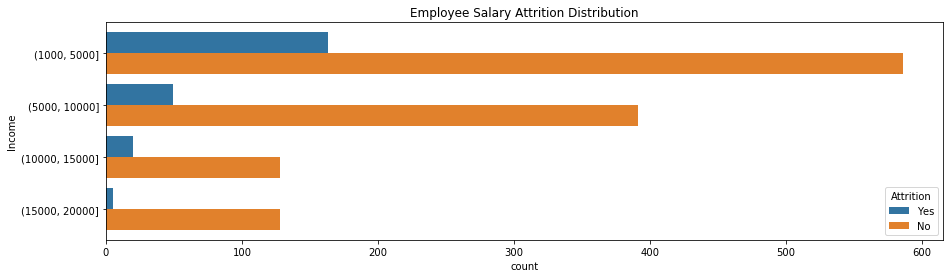

In [8]:
Data['Income']=pd.cut(Data['MonthlyIncome'],[1000,5000,10000,15000,20000])
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='Income',hue='Attrition',data=Data).set_title('Employee Salary Attrition Distribution')
plt.plot()

## 5. Statistic Tesing


### Hypotesis 

##### Age and Attrition Rate

*  H0 : Those who answered "yes" have the same age as those who answered "no"
*  H1 :Those who answered "yes" have not same age as those who answered "no"

...

In [12]:
def number_or_category(Data_test):
    try:
        try_=Data_test+1
    except:
        Data_type="category"
    else:
        Data_type="number"
    return (Data_type)
# target have type là number and feature have type category

def Xuly_T_test(Data,feature,target,STT,HT):

    # Tính số thuộc tính trong feature example BusinessTravel have 3 tt là Non-Travel,Travel Rately and Travel Frequently
    feature_set=set(Data[feature]) # convert set{} to remove thuộc tính  same
    #print(feature_set)
    so_thuoc_tinh_feature=len(feature_set)
    #print(so_thuoc_tinh_feature)
    if so_thuoc_tinh_feature==1:
        Not_key.append(feature)
    else:
        # tách data của target theo từng thuộc tính trong feature
        sample=[]
        for thuoc_tinh in feature_set:
            row=(Data[Data[feature]==thuoc_tinh].index)
            po_target=list(Data[target][row])
            sample.append(po_target)
        #print(sample)
        if len(sample) ==2 :
            f,p=stats.ttest_ind(sample[0],sample[1])
            if p< 0.05:
                P_value.append(str((1-p)*100))
                if HT ==1:
                    
                    Key_factor.append(target)
                else: 
                    Key_factor.append(feature)
            else :
                if HT ==1:
                    Not_key.append(target)
                else:
                    Not_key.append(feature)
        if len(sample) > 2: # có nhiều hơn 2 thuộc tính xét các cặp nếu 1 cặp khác nhau thì khác nhau
            khac=0
            for i in range(len(sample)-1):
                f,p=stats. f_oneway(sample[i],sample[i+1])
                if p <0.05:
                    P_value.append(str((1-p)*100))
                    khac=1
                    break
            if khac==1:
                if HT ==1:
                    Key_factor.append(target)
                else: 
                    Key_factor.append(feature)

            else :
                if HT ==1:
                    Not_key.append(target)
                else:
                    Not_key.append(feature)

# Dùng Correlation để xử lý target là number và feature là number 
def Xuly_Correlation(Data,feature,target,STT):
    # lấy random 50 data của feature và của target
    
    sample_feature=random.sample(list(Data[feature]),k=50)
    sample_target=random.sample(list(Data[target]),k=50)
    r,p=stats.pearsonr(sample_feature, sample_target)
    #print(r,p)
    if abs(r) >= 0.7 :
        Key_factor.append(feature) 
    else:
        Not_key.append(feature)
# input data type file.csv
Data=pd.read_csv("Data.csv")
#print(Data.shape)
#print(Data.head(1))
def main_(Data,target):
  
    target_type=number_or_category(Data[target][0])
    #print("Target có dạng ",target_type)
    STT=0
    for col in range(Data.shape[1]):
        if Data.columns[col] !="Attrition" and Data.columns[col] !="JobSatisfaction" :
            feature=Data.columns[col]
            feature_type=number_or_category(Data.iloc[0][col])
            #print(feature_type)
            if target_type=="number" and feature_type == "number":
                pass #Xuly_Correlation(Data,feature,target,STT)
            if target_type=="number" and feature_type == "category":
                Xuly_T_test(Data,feature,target,STT,0)
            if target_type=="category" and feature_type == "number":
                #Reverve H0
                Xuly_T_test(Data,target,feature,STT,1)
            
            if target_type=="category" and feature_type == "category":
                # convert  target to binary
                #thuộc tính đầu tiên của target đưa về 0 còn lại đưa về 1(với attrition có 2 thuộc tính là yes và no)
                #nếu chỉ có 1 thuộc tính thì đều chuyển =0  > sẽ không ảnh hưởng và p=nan %
                target_set=list(set(Data[target]))
                thuoc_tinh0=target_set[0]
                # lấy row có thuộc tính ==thuoc_tinh0
                row=list(Data[Data[target]==thuoc_tinh0].index)
                #print(row)
                Data_binary=Data
                #print(Data_binary)
                #chuyển tất cả các data của target =1
                Data_binary[target]=1
                #chuyển các data của target có thuoc_tinh0=0
                for r in row:
                    Data_binary[target].loc[r]=0
                #print(Data_binary)
                # target có dạng number và feature có dang category
                Xuly_T_test(Data_binary,feature,target,STT,0)
        STT+=1
Key_factor=[]
P_value=[]
Not_key=[]
print("What are key factors that are playing into current attrition Rate ?")      
main_(Data,"Attrition") 
#print(Key_factor)
#print(P_value)
# Create tabel
table1 = pd.DataFrame()
table1["Is Key Factor"]=Key_factor
table1["Reliability(%)"]=P_value
print(table1) 



What are key factors that are playing into current attrition Rate ?
              Is Key Factor     Reliability(%)
0                       Age  99.99999991643692
1            BusinessTravel  97.80067109717704
2                 DailyRate  97.01418393397351
3                Department  99.87857836969033
4          DistanceFromHome  99.72069399197866
5            EducationField  99.69056971019504
6   EnvironmentSatisfaction  99.99282766145063
7            JobInvolvement  99.99994322934643
8                  JobLevel  99.99999999320461
9                   JobRole   99.9999998804063
10            MaritalStatus  99.99999882914162
11            MonthlyIncome  99.99999992852636
12                 OverTime              100.0
13         StockOptionLevel  99.99998698985034
14        TotalWorkingYears  99.99999999593813
15    TrainingTimesLastYear  97.74215002627987
16          WorkLifeBalance  98.57889450109786
17           YearsAtCompany   99.9999768112839
18       YearsInCurrentRole  99.9999999

**OverTime =100% => Employees who do not accept overtime will leave**
###### These feature are likely is key factor:
* TotalWorkingYear (0.17)
* Joblevel (0.17)
* Age (0.16)
* MonthlyIncome(0.16)
* YearslnCurrentRole (0.16)
* YearsWithCurrManager (0.16)
##### Is key factor with P too low => % high~ 100%

**Convert JobSatisfaction to category**
* TooLow
* Low
* High
* TooHigh

In [35]:
Data_c=Data
Data_c["JobSatisfaction"]=Data_c["JobSatisfaction"].replace(1,"TooLow")
Data_c["JobSatisfaction"]=Data_c["JobSatisfaction"].replace(2,"Low")
Data_c["JobSatisfaction"]=Data_c["JobSatisfaction"].replace(3,"High")
Data_c["JobSatisfaction"]=Data_c["JobSatisfaction"].replace(4,"TooHigh")
print(Data_c["JobSatisfaction"])





0       TooHigh
1           Low
2          High
3          High
4           Low
         ...   
1465    TooHigh
1466     TooLow
1467        Low
1468        Low
1469       High
Name: JobSatisfaction, Length: 1470, dtype: object


In [36]:
Key_factor=[]
P_value=[]
Not_key=[]
print("What are key factors that are playing into current JobSatisfaction Rate ?")      
main_(Data,"JobSatisfaction") 
#print(Key_factor)
#print(P_value)
# Create tabel
table2 = pd.DataFrame()
table2["Is Key Factor"]=Key_factor
table2["Reliability(%)"]=P_value
print(table2)

What are key factors that are playing into current JobSatisfaction Rate ?
  Is Key Factor     Reliability(%)
0    HourlyRate  98.96224051078642


## 6.Final verdict

1.Key factors to Attrition.


* Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField
* EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,MaritalStatus
* MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear
* WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManage


* =>The closer r(corralation ) is to abs(1),p(t test) is smaler 

2.Key factor to JobSactisfaction

* HourlyRate 